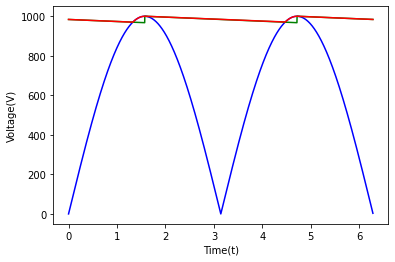

In [1]:
#runs in Python 3.7.4 on MacOS
#and in Pythonista 3.6 on iPadOS
# curveplot1.py
import matplotlib.pyplot as plt
import numpy as np
from  math import*

"""
sON     =  "abs(   (0>sin(200*pi*Ch(""t"")+A )) AND   (0>sin(200*pi*Ch(""t"")+B )))"
sOFF    =  "abs(NOT(0>sin(200*pi*Ch(""t"")+A )) OR NOT(0>sin(200*pi*Ch(""t"")+B )))"
sSINrec =  "abs(sin(100*pi*Ch(""t"")))"
sDECH   = "pp1* (arctan(tan(100*pi*Ch(""t""))) + pp2)"

 sFormula1 = "C*(" & sON  & "*" & sSINrec & "+" & sOFF & " * " & sDECH & ") + O"

Sub setDCI(iCurve,sSymbols,sValues,sUnit,Pts,t0,dt)
'      sSymbols = array("Ampl" , "Start"     ,  "Stop"         , "pp1"     , "pp2"     , "sUnit", "O"   , "Pts", "t0", "dt")
       sSymbols = array("C"    , "A"         ,  "B"            , "pp1"     , "pp2"     , "sUnit", "O"   , "Pts", "t0", "dt")
select case iCurve
 Case 1 sValues = array("0"    , pi/3600*3575, pi/360000*56285 , -0.010378 , -94.79208 , "A"    ,  1000 , 10001,  0.0, 2E-5)
 Case 2 sValues = array("1000" , pi/3600*3575, pi/360000*56285 , -0.010378 , -94.79208 , "A"    ,  0    , 10001,  0.0, 2E-5)
"""
A = pi/360000*416285   # 416285
B = pi/360000*357500
C = 1000
pp1 = -0.010378
pp2 = -94.79208
O = 0

Fs      = 100000
f       = 50
samples = 2000
t 		= 2*pi*f/Fs*np.arange(samples)

sON     = (0<np.sin(2*t+A)) * (0>np.sin(2*t+B))
sOFF    = 1 - sON 
sSINrec = abs(np.sin(t))
sDECH   = pp1* (np.arctan(np.tan(t)) + pp2)

# sFormula1 = "C*(" & sON  & "*" & sSINrec & "+" & sOFF & " * " & sDECH & ") + O"        
y1      = C *   sSINrec                             + O 
y2      = C *                   sDECH               + O 
#y3     = C * ( sSINrec * sON + sDECH * (1 - sON )) + O
y3      = C * (sON*(sSINrec-sDECH) + sDECH) + O
#y3      = 

plt.plot(t, y1, color='b')
plt.plot(t, y2, color='g')
plt.plot(t, y3, color='r')
plt.xlabel('Time(t)')
plt.ylabel('Voltage(V)')
plt.show()